In [162]:
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import csv
from shapely.ops import MultiPoint, Polygon, Point, voronoi_diagram
from pprint import pprint
from diversipy import subset as ss
import cv2
from scipy.optimize import curve_fit




In [163]:
def psf(coord,amp,x0,y0,spreadX,spreadY,noise):
    x = coord[0]
    y= coord[1]
    #print(coord)
    result = amp * np.exp(-((x-x0)**2/2*spreadX**2+(y-y0)**2/2*spreadY**2)) + noise
    #print(result)
    return result

In [164]:
photo_data = np.load("samples/photo_object_02D53783700_20220312_11%47%32.080878__0030_b.np",allow_pickle=True)

test = np.zeros((8,8),dtype = np.uint8)
img = photo_data['img']
bluephoto = np.array([[img[x][y] if y%2 != x%2 else 0 for y in range(img.shape[1])] for x in range(img.shape[0])],dtype = np.uint8)
testColor = cv2.cvtColor(bluephoto, cv2.COLOR_BAYER_RG2BGR)

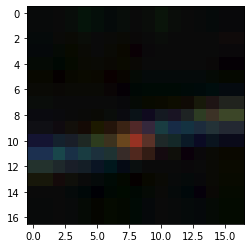

[ 6.65180214e+00 -5.31954385e+00 -3.14505206e-03  1.03747974e-02
  3.26610154e-05 -5.04560459e+00]


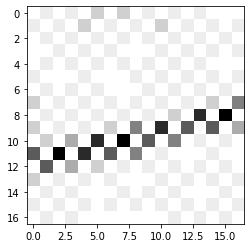

In [165]:
photo_data = np.load("samples\photo_object_02D53783700_20220312_11%47%32.080878__0030_b.np",allow_pickle=True)

img = photo_data['img']
start = photo_data['start']

green_vals = []
green_coords = []
plt.imshow(cv2.cvtColor(np.uint8(img*10), cv2.COLOR_BAYER_RG2BGR))
plt.show()
for y,row in enumerate(img):
    for x,value in enumerate(row):
        if(x%2 != y%2):
            green_vals.append(value)
            green_coords.append((x,y))
        else:
            img[y][x] = 0
#print(np.array(green_coords))
plt.imshow(img,cmap="Greys")
green_coords = np.array(green_coords)
green_vals = np.array(green_vals)
params, cov = curve_fit(psf,green_coords.T,green_vals,[0,0,0,0,0,0],maxfev = 10000)
print(params)


[[1.59607507 1.59191606 1.5870457  1.58146556 1.57517744 1.56818337
  1.56048559 1.55208657 1.54298903 1.53319587 1.52271024 1.5115355
  1.49967522 1.4871332  1.47391343 1.46002014 1.44545774]
 [1.59607507 1.59191606 1.5870457  1.58146556 1.57517744 1.56818336
  1.56048558 1.55208657 1.54298903 1.53319587 1.52271024 1.5115355
  1.49967522 1.4871332  1.47391343 1.46002014 1.44545774]
 [1.59607506 1.59191605 1.58704569 1.58146555 1.57517743 1.56818335
  1.56048557 1.55208656 1.54298901 1.53319586 1.52271023 1.51153549
  1.49967521 1.48713319 1.47391342 1.46002013 1.44545773]
 [1.59607504 1.59191603 1.58704567 1.58146553 1.57517741 1.56818334
  1.56048555 1.55208654 1.542989   1.53319584 1.52271021 1.51153547
  1.49967519 1.48713317 1.4739134  1.46002011 1.44545771]
 [1.59607502 1.59191601 1.58704565 1.58146551 1.57517739 1.56818331
  1.56048553 1.55208652 1.54298897 1.53319582 1.52271019 1.51153545
  1.49967517 1.48713315 1.47391338 1.46002008 1.44545769]
 [1.59607499 1.59191597 1.587045

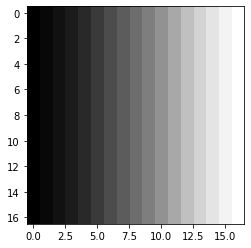

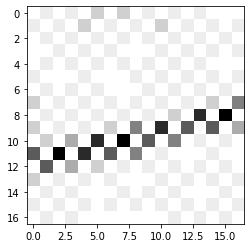

In [166]:
vals = np.zeros((17,17))
for i in range(17):
    for j in range(17):
        vals[j,i] = psf((i,j),params[0],params[1],params[2],params[3],params[4],params[5])

print(vals)
plt.imshow(vals,cmap="Greys")
plt.show()
plt.imshow(img,cmap="Greys")